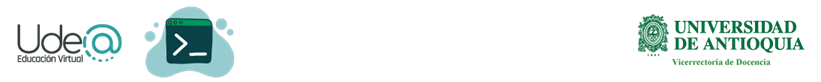

# <h1><center>K-MEANS CLUSTERING</center></h1>

**Especialización en Analítica de Datos**

*Prof. Hernán Felipe García Arias*

*Facultad de Ingeniería*

*Universidad de Antioquia*


**2026-1**


## K-MEANS from scratch

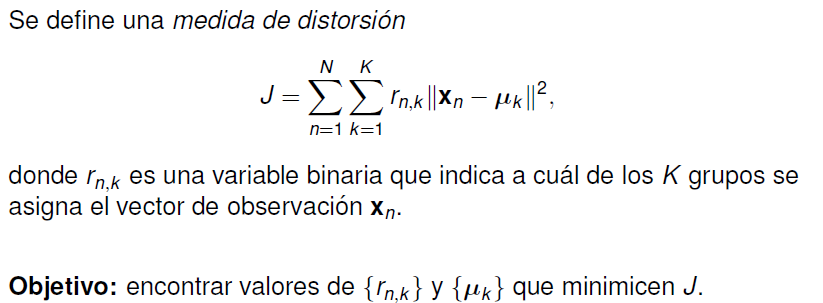

In [12]:
import numpy as np
import matplotlib.pyplot as plt


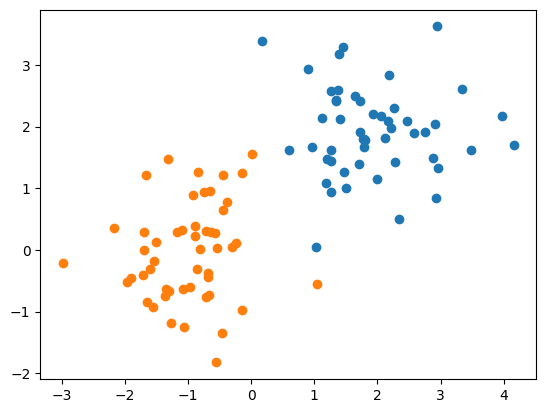

In [13]:
np.random.seed(21345)
N = 50
X1 = 0.7*np.random.randn(N,2) + [2.,2.]
X2 = 0.7*np.random.randn(N,2) + [-1.,0.]
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.show()

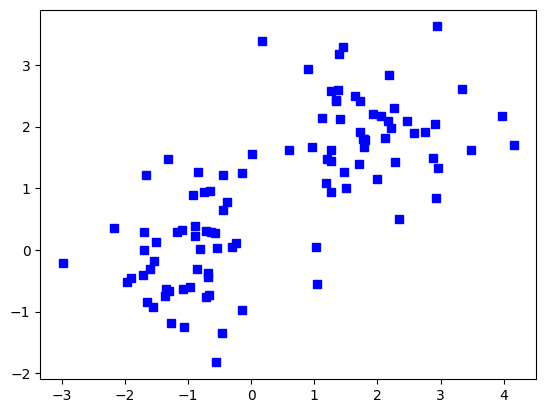

In [14]:
# En realidad en aprendizaje no supervisado sólo tengo X
plt.plot(X1[:,0],X1[:,1],'sb')
plt.plot(X2[:,0],X2[:,1],'sb')
plt.show()



**Paso 1**

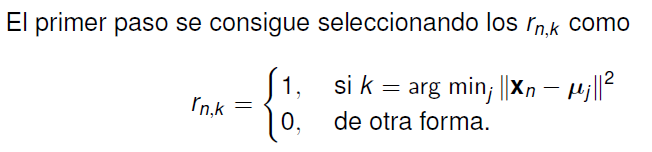

**Paso 2**

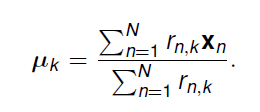

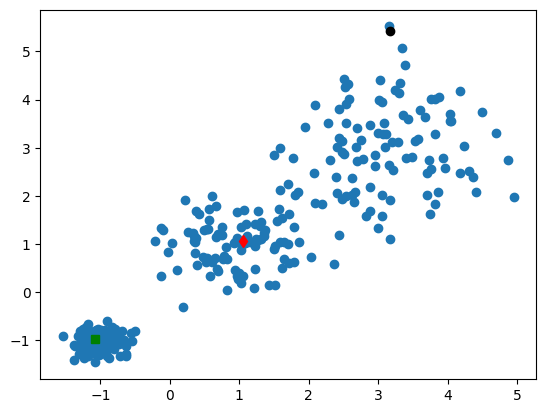

In [49]:
# np.random.seed(21345)
N = 100
X1 = 0.8*np.random.randn(N,2) + [3.,3.]
t1 = np.zeros((N,1))
X2 = 0.2*np.random.randn(N,2) + [-1.,-1.]
t2 = np.ones((N,1))
X3 = 0.5*np.random.randn(N,2) + [1.,1.]
t3 = 2.0*np.ones((N,1))


t = np.concatenate((t1,t2,t3))

X = np.concatenate((X1,X2,X3),axis=0)
# Inicializamos los mu_k
K = 3

mu_1 = 0.1*np.random.randn(2,1) + np.reshape([1,1],(2,1))
mu_2 = 0.1*np.random.randn(2,1) + np.reshape([-1,-1],(2,1))
mu_3 = np.random.randn(2,1) + np.reshape([2,5],(2,1))

MU = np.concatenate((mu_1,mu_2,mu_3),axis=1)

plt.figure
plt.scatter(X[:,0],X[:,1])
plt.plot(mu_1[0],mu_1[1],'dr')
plt.plot(mu_2[0],mu_2[1],'sg')
plt.plot(mu_3[0],mu_3[1],'ok')
plt.show()

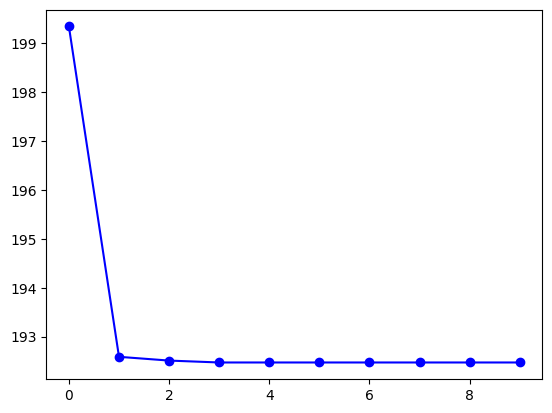

In [28]:



dist_nk = np.zeros((N*3,K))
R_nk = np.zeros((N*3,K))
J = []

max_iters = 10

for iters in range(0,max_iters):
  for n in range(0,N*3):
    x_n = X[n,:]
    for k in range(0,K):
      dist_nk[n,k] = ((x_n-MU[:,k]).T)@(x_n-MU[:,k])
    aux = np.argmin(dist_nk[n,:])
    R_nk[n,:] = [0.,0.,0.]
    R_nk[n,aux] = 1.
  J.append(np.sum(R_nk*dist_nk))

  # Actualizamos los mu_k
  pos_k1 = np.where(R_nk[:,0] ==1.)[0]
  N_k1 = len(pos_k1)
  mu_1 = np.reshape(np.sum(X[pos_k1,:],axis = 0 )/float(N_k1),(2,1))
  pos_k2 = np.where(R_nk[:,1] ==1.)[0]
  N_k2 = len(pos_k2)
  mu_2 = np.reshape(np.sum(X[pos_k2,:],axis = 0 )/float(N_k2),(2,1))
  pos_k3 = np.where(R_nk[:,2] ==1.)[0]
  N_k3 = len(pos_k3)
  mu_3 = np.reshape(np.sum(X[pos_k3,:],axis = 0 )/float(N_k3),(2,1))
  MU = np.concatenate((mu_1,mu_2,mu_3),axis=1)

plt.figure
plt.plot(J,'-ob')
plt.show()



In [17]:
R_nk

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [18]:
t_est = np.argmax(R_nk,axis=1)
print(t_est)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


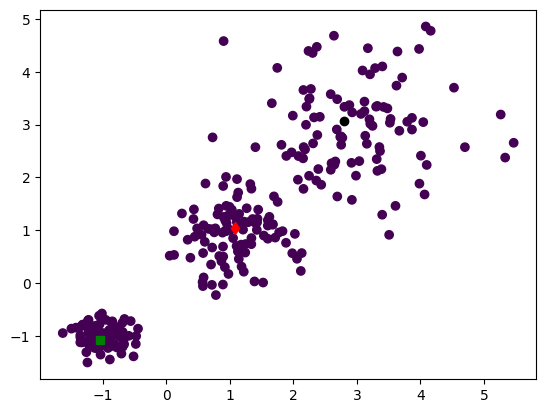

Adjusted Rand index:  0.9509425707085792


In [33]:
plt.figure
plt.scatter(X[:,0],X[:,1],c = t_est)
plt.plot(mu_1[0],mu_1[1],'dr')
plt.plot(mu_2[0],mu_2[1],'sg')
plt.plot(mu_3[0],mu_3[1],'ok')
plt.show()


from sklearn.metrics import adjusted_rand_score
print('Adjusted Rand index: ',adjusted_rand_score(t.ravel(),np.argmax(R_nk,axis=1)))

In [32]:
# Rnk
# R_nk

Observemos la matriz de Distancias "norma euclideana"


In [ ]:
print(dist_nk)

[[4.53590452e+00            nan            nan]
 [9.38635205e+00            nan            nan]
 [9.84402445e+00            nan            nan]
 [1.35742639e+01            nan            nan]
 [2.46767433e+01            nan            nan]
 [5.80838551e+00            nan            nan]
 [2.85927298e+00            nan            nan]
 [9.07847536e+00            nan            nan]
 [5.05923095e+00            nan            nan]
 [9.20364407e+00            nan            nan]
 [3.40813484e+00            nan            nan]
 [2.00498766e+00            nan            nan]
 [2.30704277e+01            nan            nan]
 [9.00236766e+00            nan            nan]
 [8.00086631e-01            nan            nan]
 [1.62190419e+01            nan            nan]
 [6.26477733e+00            nan            nan]
 [7.93100243e+00            nan            nan]
 [8.61265671e+00            nan            nan]
 [6.61333599e+00            nan            nan]
 [1.07752123e+01            nan         

*about Rand index*:
 - Rand-Index is a metric to evaluate the quality of a clustering technique. Clustering is an unsupervised machine learning technique which is used to group the similar type of data into a single cluster so rand-index tells us how well a cluster is build. Basically It compares how pairs of data points are grouped together in the predicted cluster versus the true cluster. The Rand Index provides a single score that indicates the proportion of agreements between the two clusters.

- In other words, the Rand-Index is a measure used to evaluate the similarity between two different clustering’s of data . It assesses the level of agreement between the clusters produced by two different methods or algorithms.